 Created on 4 March 2022

---
<br>

Zehra

ortak22@itu.edu.tr


<a id="0"></a> <br>
## <font color='red'>[Table of Contents](#0)</font>

1. [Requirements](#1)
1. [Useful Functions](#2)<br>
1. [Q1: Recent big data tools and big data platforms](#3)<br>
    3.1. [Hadoop On-Premise vs Hadoop in the Cloud](#4) <br>
    3.2. [Big data Cloud Platforms](#5)<br>    
1. [Q2: Highlighted big data projects in last two years](#6)<br>
    4.1. [Open Source Big Data Projects](#7) <br>
    4.1. [Correlation between search keywords](#8) <br>
1. [Result](#9)




We examined the use of Hadoop on-prem and cloud.
"Hadoop in cloud" is more searched. When we examine it on a country basis, we saw that on-prem hadoop is generally researched in India. 
We gathered on-prem hadoop researches in three groups :cloudera hadoop, hortonworks hadoop, MapR hadoop. Cloudera hadoop is dominantly researched in google.
<br>
We gathered cloud-based hadoop researches in five groups :amazon hadoop, dataproc hadoop, treasure data hadoop, qubole hadoop, azure hadoop. Overall, Amazon is ahead. But lately azure hadoop has been researched more frequently.
<br>

Then, we compared Azure HDInsight, Dataproc from Google Cloud, Amazon EMRs as big data cloud platforms. Amazon and Google Cloud have managed to be the most researched in the big data world. If we analyze it on a country-by-country basis, Azure is the most researched in India, AWS is  in Australia, and Google Cloud is in South Korea.
<br>
<br>

We examined five of big data project closely: Apache Beam, Apache Cassandra ,Apache Flink ,Apache Kafka, Apache Spark.
Spark has been the most researched project overall and Kafka is the second one. If we analyze it on a country-by-country basis, we will notice that Flink is mostly researched in China.
<br>

When we look at the relationship between the big data projects thanks to correlation map, We see that Apache projects are closely related to each other.
The closest ones are:
- Apache Zeppelin - Apache Spark
- Apache Kafka - Apache Spark
- Apache Beam - Apache Spark
- Apache Kafka - Apache Flink

## <a id="1"></a> <br>
## <font color='red'>1. Requirements</font>

In [3]:
!pip install pytrends
!pip install seaborn
!conda install -c anaconda pandas
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
/bin/bash: conda: command not found
Defaulting to user installation because normal site-packages is not writeable


In [4]:
import sys
!{sys.executable} -m pip install pytrends

Defaulting to user installation because normal site-packages is not writeable


In [5]:
!{sys.executable} -m pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [6]:
!{sys.executable} -m pip install plotly

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip install plotly==5.6.0

In [3]:
from pytrends.request import TrendReq
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
from IPython.display import display, HTML

In [4]:
pytrends = TrendReq(hl='en-US', tz=360)

[Return to Table of contents](#0)

<a id="2"></a> <br>
## <font color='red'>2. Useful Functions</font>

In [5]:
def set_new_query(kwords, timeframe):
    pytrends.build_payload(kwords, cat=0, timeframe=timeframe, geo='', gprop='')
    return kwords
def get_interest_over_time():
    df_ = pytrends.interest_over_time()
    df_.drop(['isPartial'], axis='columns', inplace=True)
    df_.reset_index(inplace=True)
    df_.date = pd.to_datetime(df_.date, format='%Y-%m-%d')
    df_.rename(columns={'date': 'Date'}, inplace=True)
    return df_

def get_interest_by_region(): 
    df_ = pytrends.interest_by_region(resolution='COUNTRY')
    df_ = df_.loc[~(df_==0).all(axis=1)]
    df_.reset_index(inplace=True)
    df_.rename(columns={'geoName': 'Region'}, inplace=True)
    return df_



def get_related_queries(): 
    return pytrends.related_queries()

def get_related_topics():
    return pytrends.related_topics()

In [6]:
def plot_interest_over_time(kwords, dataframe=None, update=False):
    
    color_list = ['navy', 'red', 'green', 'magenta', 'orange', 'purple']
    data = []
    
    if update:
        df_ = get_interest_over_time()
    else:
        df_ = dataframe
   
    if dataframe is not None:
        dataframe = df_

    for i in range(len(kwords)):
        trace = go.Scatter(x=list(df_.Date),
                          y=list(df_[kwords[i]]),
                          name = kwords[i],
                          line = dict(color = color_list[i])
                         )
        data.append(trace)
    
    layout = dict(
        title='Interest over time',
        yaxis={'title': 'Interest'},
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1,
                         label='1m',
                         step='month',
                         stepmode='backward'),
                    dict(count=6,
                         label='6m',
                         step='month',
                         stepmode='backward'),
                    dict(count=1,
                        label='YTD',
                        step='year',
                        stepmode='todate'),
                    dict(count=1,
                        label='1y',
                        step='year',
                        stepmode='backward'),
                    dict(step='all')
                ])
            ),
            rangeslider=dict(
                visible = True
            ),
            type='date'
        )
    )

    fig = dict(data=data, layout=layout)
    py.iplot(fig)
    return df_


def table_interest_over_time(kwords, dataframe=None, update=False):
    if update:
        df_ = get_interest_over_time()
    else:
        df_ = dataframe
    if dataframe is not None:
        dataframe = df_
    py.iplot(ff.create_table(df_.tail(10)))
    return df_


def table_interest_by_region(kwords, dataframe=None, update=False):
    if update:
        df_ = get_interest_by_region()
    else:
        df_ = dataframe
    if dataframe is not None:
        dataframe = df_
    py.iplot(ff.create_table(df_.head(10)))
    return df_

def barplot_interest_by_region(kwords, dataframe=None, update=False):
    
    if update:
        df_ = get_interest_by_region()
    else:
        df_ = dataframe
    if dataframe is not None:
        dataframe = df_

    x = df_.Region

    data = []

    for each in kwords:
        trace = {
          'x': x,
          'y': df_[each],
          'name': each,
          'type': 'bar'
        }
        data.append(trace)

    layout = {
      'xaxis': {'title': 'Countries'},
      'yaxis': {'title': 'Interest'},
      'barmode': 'relative',
      'title': 'Compared breakdown by country'
    }

    py.iplot({'data': data, 'layout': layout})
    return df_


def table_related_queries(kwords, queries, n=10):
    for each in kwords:
        df_rq_top = pd.DataFrame(queries[each]['top'])
        df_rq_rising = pd.DataFrame(queries[each]['rising'])
        df_rq = pd.concat([df_rq_top, df_rq_rising], axis=1, keys=(["Top", "Rising"])).reset_index(drop=True)
        df_rq.index = np.arange(1, len(df_rq) + 1)
        print(each + " related queries")
        display(df_rq.head(n))


def table_related_topics(kwords, topics, n=10):
    for each in kwords:
        df_rq_top = pd.DataFrame(topics[each]['top'])
        df_rq_rising = pd.DataFrame(topics[each]['rising'])
        df_rq = pd.concat([df_rq_top, df_rq_rising], axis=1, keys=(["Top", "Rising"])).reset_index(drop=True)
        df_rq.index = np.arange(1, len(df_rq) + 1)
        print(each + " topics")
        display(df_rq.head(n))
        #df_ = pd.DataFrame(topics[each])
        #df_.drop(['mid'], axis='columns', inplace=True)
        #print(each + " related topics")
        #py.iplot(ff.create_table(df_.head(n)))

[Return to Table of contents](#0)

<a id="3"></a> <br>
## <font color='red'>Q1: Recent big data tools and big data platforms</font>

We examined the use of Hadoop on-prem and cloud.Then we looked at Azure HDInsight, Dataproc, Amazon EMR usage percentages by region.

<a id="4"></a> <br>
### <font color='red'> 1.1. Hadoop On-Premise vs Hadoop in the Cloud</font>


**Hadoop On-Premise**

- cloudera
- hortonworks
- MapR
- pivotal
- bluedata
- jethro


**Hadoop in the Cloud**

- cazena
- amazon hadoop
- dataproc
- altiscale
- qubole
- treasure data
- hadoop on azure

In [8]:
kw_list = set_new_query(["Hadoop On-Premise","Hadoop in the Cloud"], "all")

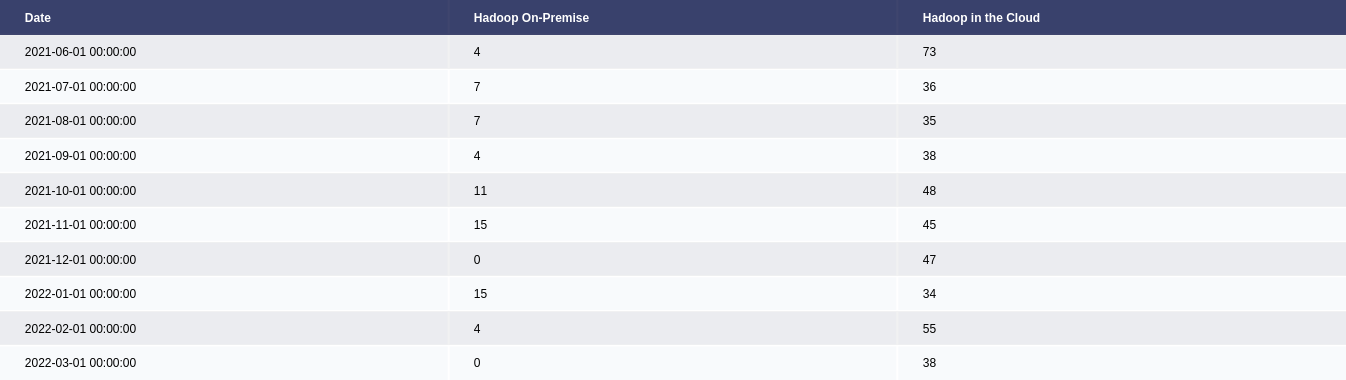

In [9]:
df = table_interest_over_time(kw_list, None, True);

In [10]:
display(df.describe().T.round(2))
display(df.corr().round(2))

,count,mean,std,min,25%,50%,75%,max
Hadoop On-Premise,219.0,2.75,5.83,0.0,0.0,0.0,4.0,36.0
Hadoop in the Cloud,219.0,14.83,16.93,0.0,0.0,12.0,23.0,100.0


,Hadoop On-Premise,Hadoop in the Cloud
Hadoop On-Premise,1.00,0.32
Hadoop in the Cloud,0.32,1.00


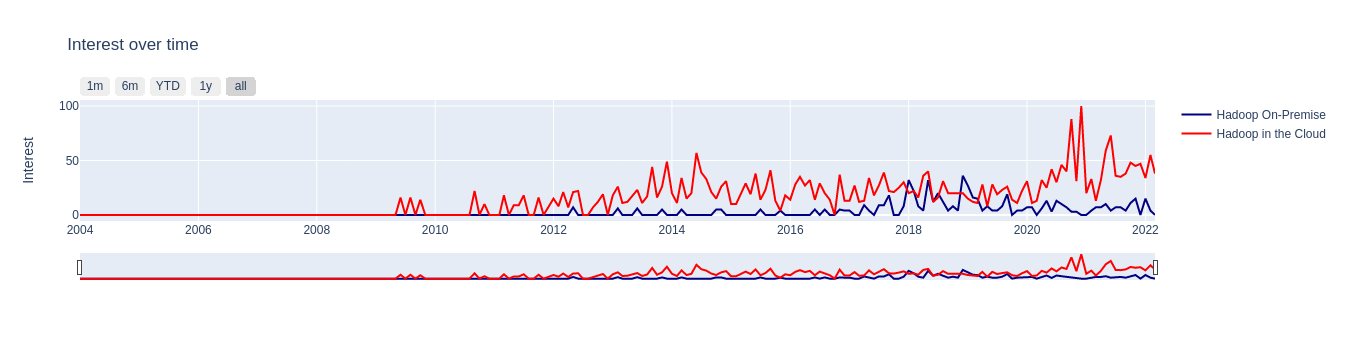

,Date,Hadoop On-Premise,Hadoop in the Cloud
0,2004-01-01,0,0
1,2004-02-01,0,0
2,2004-03-01,0,0
3,2004-04-01,0,0
4,2004-05-01,0,0
...,...,...,...
214,2021-11-01,15,45
215,2021-12-01,0,47
216,2022-01-01,15,34
217,2022-02-01,4,55


In [11]:
plot_interest_over_time(kw_list, df)

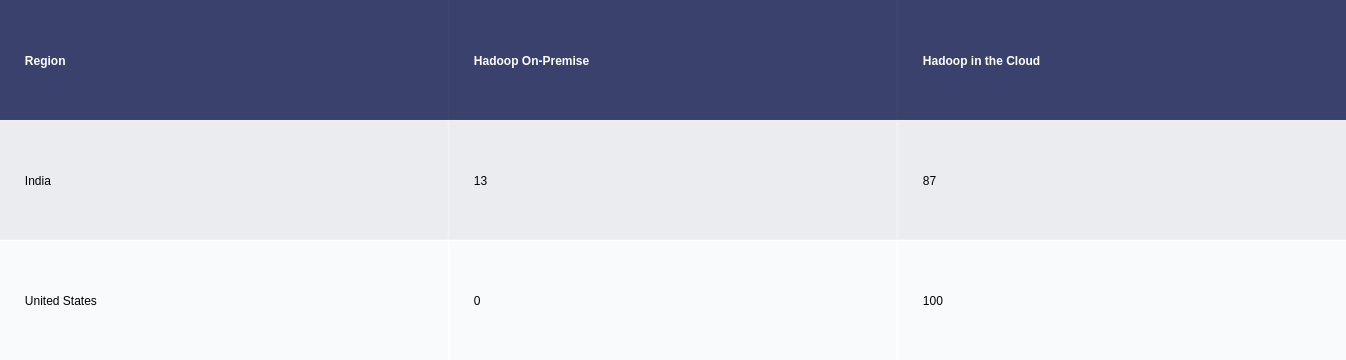

In [12]:
df_by_region = table_interest_by_region(kw_list, None, True)

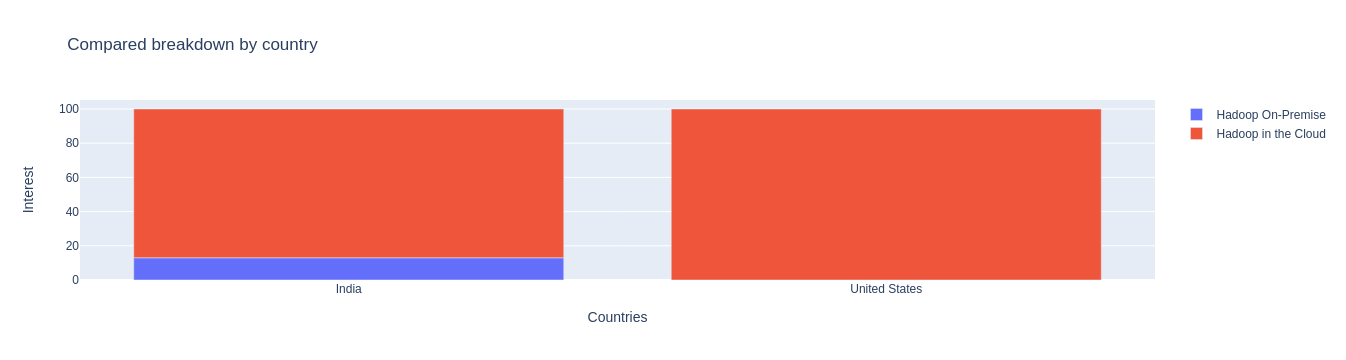

In [13]:
barplot_interest_by_region(kw_list, df_by_region);

[Return to Table of contents](#0)

In [14]:

table_related_queries(kw_list, get_related_queries())

Hadoop On-Premise related queries


Top        \
                                                query value   
1   microsoft and hortonworks joined their forces ...   100   
2                the vm size determines the number of    39   
3   which of the following is a worldwide content ...    36   
4   azure storage plays the same role in azure tha...    33   
5   what’s the maximum bandwidth provided by expre...    30   
6   which of the following vm configurations quali...    28   
7            a subnet is a range of ip addresses in a    28   
8   which of the following vm configurations quali...    27   
9   sql azure is a cloud-based relational database...    24   
10  azure data is replicated times for data protec...    24   

                                               Rising           
                                                query    value  
1   microsoft and hortonworks joined their forces ...  4501700  
2                the vm size determines the number of  1749200  
3   which of the following is a worldwide content ...  1614650  
4   azure storage plays the same role in azure tha...  1480100  
5   what’s the maximum bandwidth provided by expre...  1340150  
6   which of the following vm configurations quali...  1278200  
7            a subnet is a range of ip addresses in a  1273100  
8   which of the following vm configurations quali...  1210950  
9   sql azure is a cloud-based relational database...  1076400  
10  azure data is replicated times for data protec...  1076400

Hadoop in the Cloud related queries


Top        \
                                                query value   
1                                     cloud computing   100   
2                                      what is hadoop    88   
3                               big data in the cloud    64   
4                             what is cloud computing    58   
5                                     hadoop tutorial    10   
6   microsoft and hortonworks joined their forces ...     7   
7   if you have to replace your current on-premise...     4   
8   what’s the maximum bandwidth provided by expre...     3   
9   in a word cloud the size of the letter is a fu...     3   
10  all of the following accurately describe hadoo...     2   

                                               Rising           
                                                query    value  
1                                     cloud computing  3401850  
2                                      what is hadoop  3010300  
3                               big data in the cloud  2193350  
4                             what is cloud computing  1958850  
5                                     hadoop tutorial   342600  
6   microsoft and hortonworks joined their forces ...   238300  
7   if you have to replace your current on-premise...   119100  
8   what’s the maximum bandwidth provided by expre...   104200  
9   in a word cloud the size of the letter is a fu...    89300  
10  all of the following accurately describe hadoo...    74400

#### <font color='red'>Hadoop On-Premise</font>

**Decision of selected words**

In [15]:
pytrend.build_payload(kw_list=['hadoop aws'])


related_queries = pytrend.related_queries()
related_queries.values()

dict_values([{'top':               query  value
0             spark    100
1      hadoop spark    100
2         aws spark    100
3         spark aws     99
4           aws emr     96
5               emr     96
6     hadoop on aws     85
7            aws s3     56
8                s3     56
9        amazon aws     49
10    amazon hadoop     49
11   hadoop cluster     41
12        aws cloud     40
13     hadoop cloud     40
14         big data     39
15     aws big data     39
16  big data hadoop     39
17  hadoop big data     39
18   what is hadoop     37
19      what is aws     37
20    apache hadoop     37
21           apache     37
22            azure     27
23     azure hadoop     27
24         aws glue     17, 'rising':                                                 query  value
0                                        aws snowball  30200
1                                             aws dms  22100
2                                      is hadoop dead  14450
3                     

We decided to add **"amazon hadoop"** search keyword.

In [16]:
pytrend.build_payload(kw_list=['google cloud hadoop'])


related_queries = pytrend.related_queries()
related_queries.values()

dict_values([{'top':                                    query  value
0                  google cloud platform    100
1                                  spark     98
2                        cloud computing     86
3                                    aws     84
4                         what is hadoop     79
5                          apache hadoop     73
6                   google cloud storage     73
7                                  azure     58
8              hadoop in cloud computing     51
9                         cloud dataproc     47
10                                  hdfs     44
11                     google app engine     43
12                                  hive     41
13                      google analytics     38
14                       hadoop tutorial     33
15                          apache spark     30
16               what is cloud computing     28
17                        cloud dataflow     26
18                 azure vs google cloud     25
19                 

We decided to add **"dataproc"** search keyword.

In [17]:
pytrend.build_payload(kw_list=['hadoop azure'])


related_queries = pytrend.related_queries()
related_queries.values()

dict_values([{'top':                      query  value
0          hadoop on azure    100
1          microsoft azure     98
2   microsoft azure hadoop     98
3           what is hadoop     70
4            what is azure     70
5              azure cloud     69
6             spark hadoop     66
7                    spark     65
8            azure storage     64
9          azure hdinsight     62
10               hdinsight     62
11         azure data lake     60
12               data lake     60
13                     aws     58
14              aws hadoop     58
15                  apache     57
16           apache hadoop     56
17                big data     54
18          azure big data     52
19         big data hadoop     52
20          hadoop cluster     49
21             hortonworks     45
22             hadoop hive     42
23                    hive     41
24          azure services     37, 'rising':                                                 query   value
0   microsoft and hort

We decided to add **"hadoop on azure"** search keyword.

We will compare three different hadoop data tools.

In [18]:
kw_list = set_new_query(["cloudera hadoop","hortonworks hadoop","MapR hadoop"], "all")

# "cloudera","hortonworks","MapR","pivotal","bluedata","jethro"

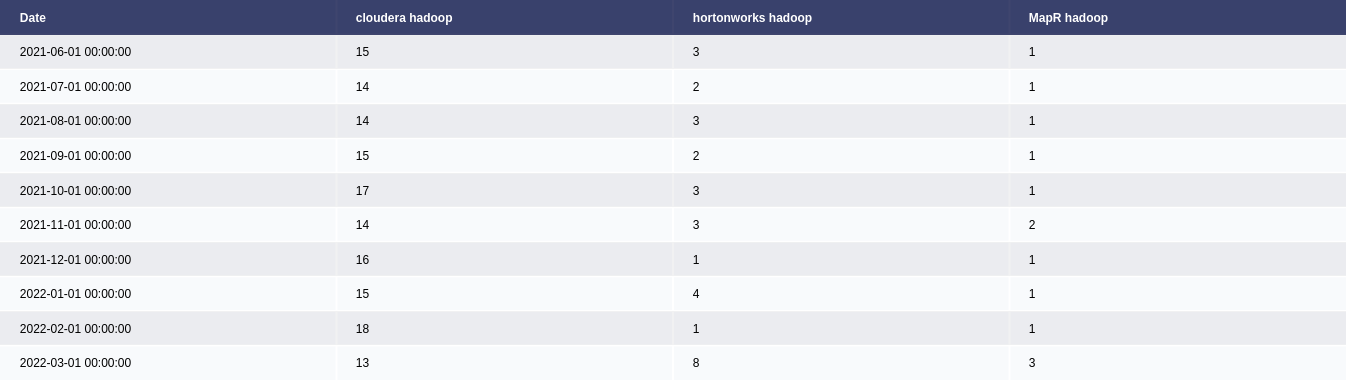

In [19]:
df = table_interest_over_time(kw_list, None, True);

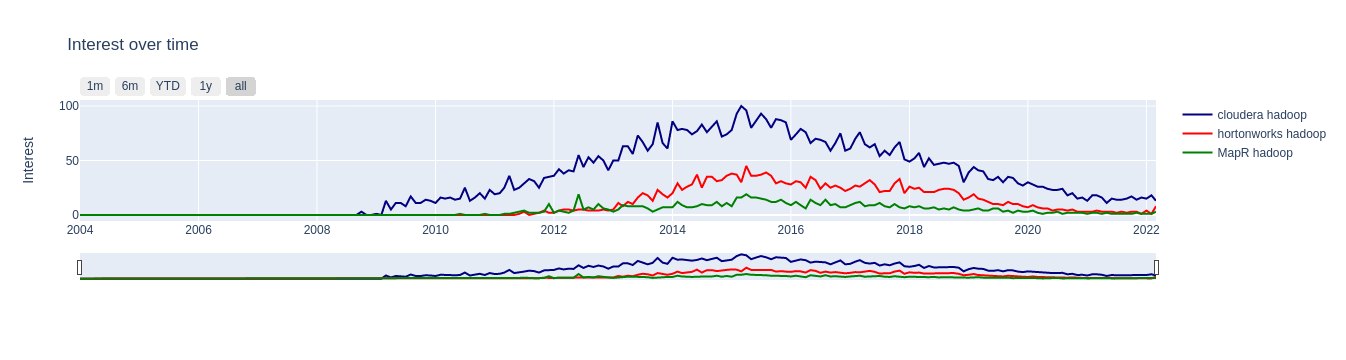

,Date,cloudera hadoop,hortonworks hadoop,MapR hadoop
0,2004-01-01,0,0,0
1,2004-02-01,0,0,0
2,2004-03-01,0,0,0
3,2004-04-01,0,0,0
4,2004-05-01,0,0,0
...,...,...,...,...
214,2021-11-01,14,3,2
215,2021-12-01,16,1,1
216,2022-01-01,15,4,1
217,2022-02-01,18,1,1


In [21]:
plot_interest_over_time(kw_list, df)

In [20]:
display(df.describe().T.round(2))
display(df.corr().round(2))

,count,mean,std,min,25%,50%,75%,max
cloudera hadoop,219.0,32.01,29.40,0.0,0.0,25.0,56.5,100.0
hortonworks hadoop,219.0,9.96,12.41,0.0,0.0,3.0,21.0,45.0
MapR hadoop,219.0,3.90,4.56,0.0,0.0,2.0,7.0,19.0


,cloudera hadoop,hortonworks hadoop,MapR hadoop
cloudera hadoop,1.00,0.91,0.91
hortonworks hadoop,0.91,1.00,0.88
MapR hadoop,0.91,0.88,1.00


[Return to Table of contents](#0)

#### <font color='red'>Hadoop in the Cloud</font>


In [22]:
kw_list = set_new_query(["amazon hadoop","dataproc hadoop","treasure data hadoop","qubole hadoop","azure hadoop"], "all")

# (["amazon hadoop","dataproc","cazena hadoop","altiscale hadoop","qubole hadoop","hadoop on azure","treasure data hadoop"], "all")

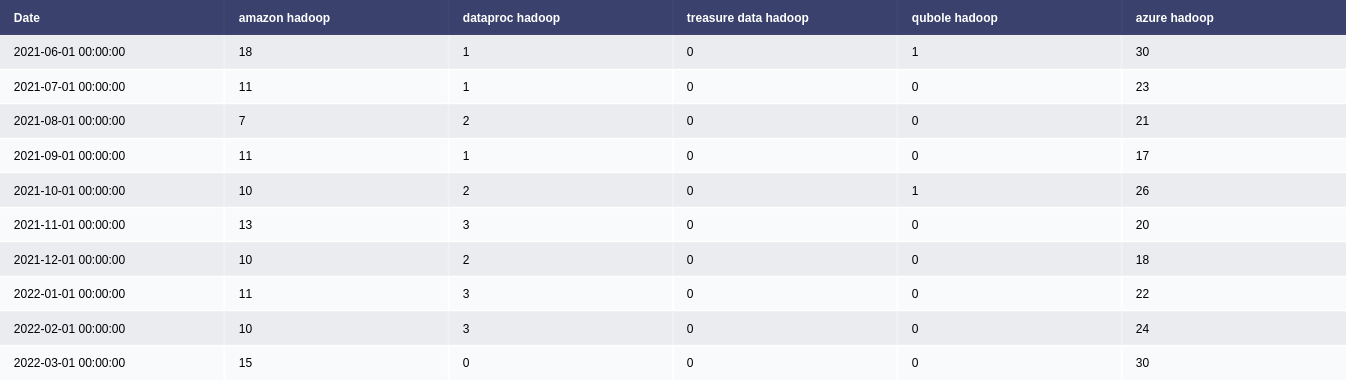

In [23]:
df = table_interest_over_time(kw_list, None, True);

In [24]:
display(df.describe().T.round(2))
display(df.corr().round(2))

,count,mean,std,min,25%,50%,75%,max
amazon hadoop,219.0,33.16,24.79,0.0,11.0,30.0,54.0,100.0
dataproc hadoop,219.0,0.98,1.72,0.0,0.0,0.0,1.0,8.0
treasure data hadoop,219.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
qubole hadoop,219.0,0.60,1.00,0.0,0.0,0.0,1.0,5.0
azure hadoop,219.0,17.95,15.84,0.0,0.0,19.0,32.0,52.0


,amazon hadoop,dataproc hadoop,treasure data hadoop,qubole hadoop,azure hadoop
amazon hadoop,1.00,-0.00,NaN,0.47,0.58
dataproc hadoop,-0.00,1.00,NaN,0.25,0.59
treasure data hadoop,NaN,NaN,NaN,NaN,NaN
qubole hadoop,0.47,0.25,NaN,1.00,0.58
azure hadoop,0.58,0.59,NaN,0.58,1.00


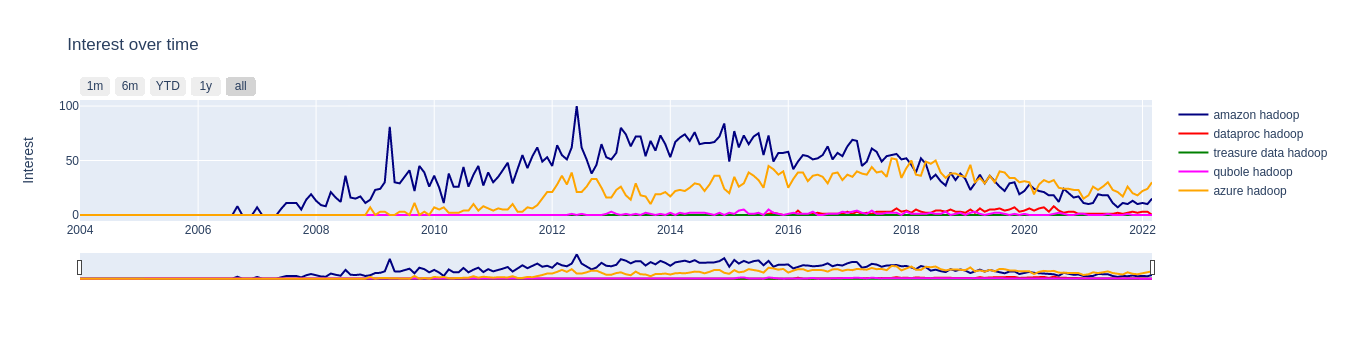

,Date,amazon hadoop,dataproc hadoop,treasure data hadoop,qubole hadoop,azure hadoop
0,2004-01-01,0,0,0,0,0
1,2004-02-01,0,0,0,0,0
2,2004-03-01,0,0,0,0,0
3,2004-04-01,0,0,0,0,0
4,2004-05-01,0,0,0,0,0
...,...,...,...,...,...,...
214,2021-11-01,13,3,0,0,20
215,2021-12-01,10,2,0,0,18
216,2022-01-01,11,3,0,0,22
217,2022-02-01,10,3,0,0,24


In [25]:
plot_interest_over_time(kw_list, df)

[Return to Table of contents](#0)

<a id="5"></a> <br>
### <font color='red'>1.2. Big data Cloud Platforms</font>

In [37]:
kw_list = set_new_query(["Big Data Cloud"], "2010-01-01 2021-01-01")
table_related_queries(kw_list, get_related_queries());

Big Data Cloud related queries


Top                              Rising         
                       query value                         query    value
1            cloud computing   100            cloud and big data  3542100
2   cloud computing big data   100      big data analytics cloud  1743850
3         cloud and big data    64            analytics big data  1739000
4                  the cloud    33            big data analytics  1731950
5   big data analytics cloud    31                data analytics  1731950
6         analytics big data    31                     analytics  1730100
7         big data analytics    31               cloud analytics  1725800
8             data analytics    31   big data in cloud computing  1660350
9                  analytics    31  cloud computing and big data  1601600
10           cloud analytics    31              what is big data  1162950

In [26]:
kw_list = set_new_query(["Azure HDInsight","Dataproc","Amazon EMR"], "all")


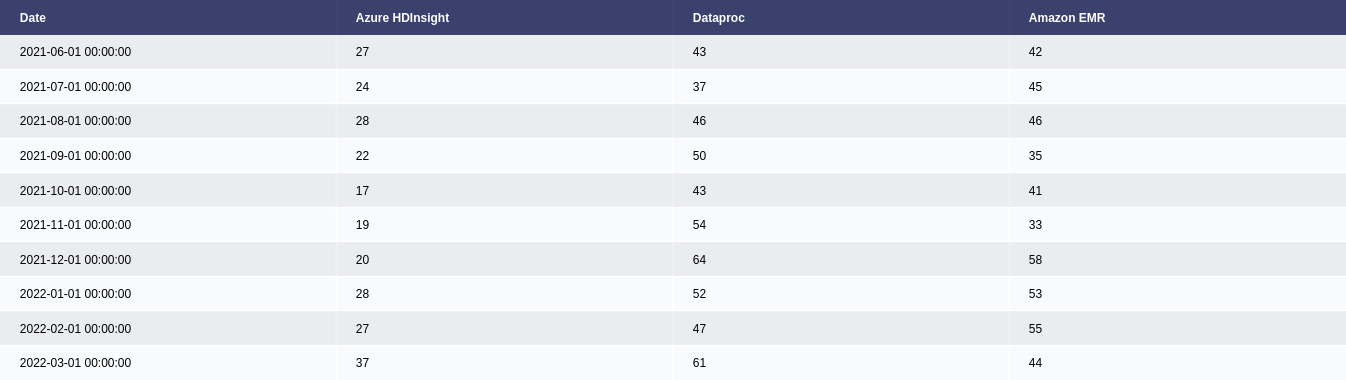

In [27]:
df = table_interest_over_time(kw_list, None, True);

In [28]:
display(df.describe().T.round(2))
display(df.corr().round(2))

,count,mean,std,min,25%,50%,75%,max
Azure HDInsight,219.0,13.46,15.69,0.0,0.0,3.0,26.0,59.0
Dataproc,219.0,17.62,28.03,0.0,0.0,0.0,33.0,100.0
Amazon EMR,219.0,27.71,25.82,0.0,0.0,25.0,49.0,85.0


,Azure HDInsight,Dataproc,Amazon EMR
Azure HDInsight,1.00,0.79,0.93
Dataproc,0.79,1.00,0.76
Amazon EMR,0.93,0.76,1.00


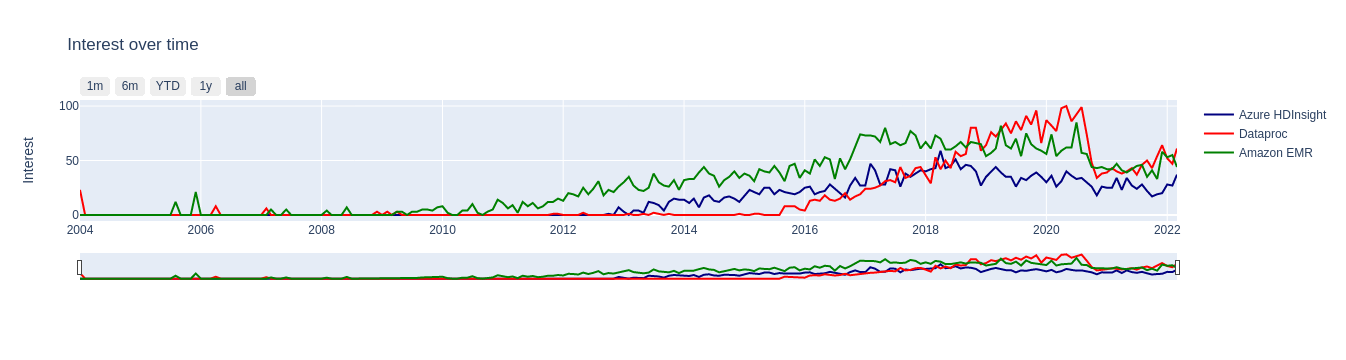

,Date,Azure HDInsight,Dataproc,Amazon EMR
0,2004-01-01,0,23,0
1,2004-02-01,0,0,0
2,2004-03-01,0,0,0
3,2004-04-01,0,0,0
4,2004-05-01,0,0,0
...,...,...,...,...
214,2021-11-01,19,54,33
215,2021-12-01,20,64,58
216,2022-01-01,28,52,53
217,2022-02-01,27,47,55


In [29]:
plot_interest_over_time(kw_list, df)

In [32]:
table_related_queries(kw_list, get_related_queries())

Azure HDInsight related queries


Top                     Rising        
                  query value                query   value
1       hdinsight spark   100      hdinsight spark  836150
2           azure spark   100          azure spark  836150
3                 spark    99                spark  831450
4     hdinsight cluster    91    hdinsight cluster  763400
5         azure storage    87        azure storage  729650
6                hadoop    87               hadoop  726400
7          azure hadoop    87         azure hadoop  726400
8       microsoft azure    84      microsoft azure  701400
9   microsoft hdinsight    81  microsoft hdinsight  675200
10      azure data lake    76      azure data lake  638900

Dataproc related queries


Top                       Rising         
                    query value                  query    value
1         google dataproc   100        google dataproc  3787600
2          cloud dataproc    89         cloud dataproc  3355400
3   google cloud dataproc    47  google cloud dataproc  1790850
4            google cloud    47           google cloud  1790850
5            gcp dataproc    46           gcp dataproc  1748250
6                     gcp    46                    gcp  1748250
7                   spark    35                  spark  1323750
8                dataflow    17               dataflow   655100
9                bigquery    12               bigquery   471950
10                pyspark     9                pyspark   356000

Amazon EMR related queries


Top                  Rising         
               query value             query    value
1            aws emr   100           aws emr  3864650
2                aws   100               aws  3864650
3         amazon aws   100        amazon aws  3864650
4   amazon emr spark    23  amazon emr spark   903050
5              spark    23             spark   903050
6          emr spark    23         emr spark   903050
7       amazon spark    23      amazon spark   901900
8          spark emr    23         spark emr   901900
9                 s3    22                s3   849250
10         amazon s3    22         amazon s3   843000

In [38]:
kw_list = set_new_query(["Azure HDInsight","Dataproc","Amazon EMR"], "2018-01-01 2021-01-01")

df = get_interest_over_time().corr().round(2); df

,Azure HDInsight,Dataproc,Amazon EMR
Azure HDInsight,1.00,-0.06,0.30
Dataproc,-0.06,1.00,0.22
Amazon EMR,0.30,0.22,1.00


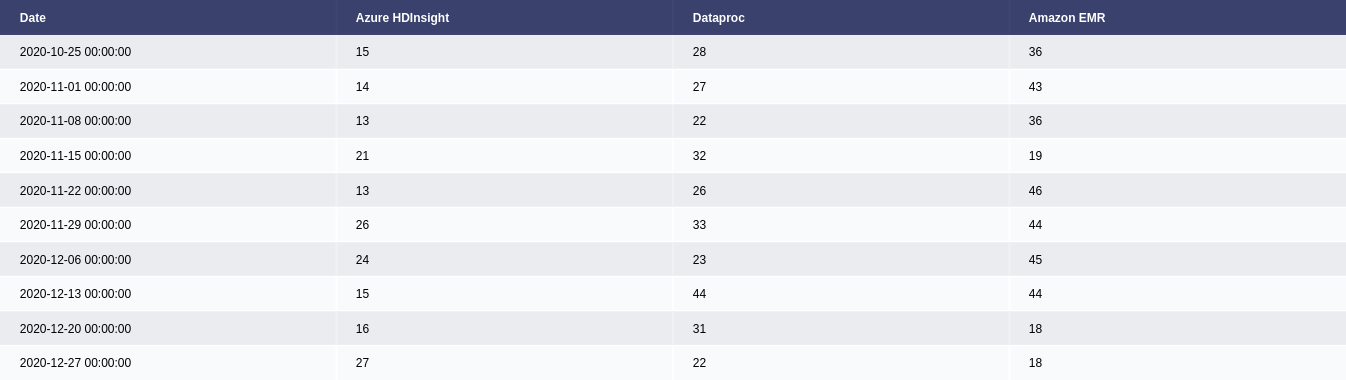

In [39]:
df = table_interest_over_time(kw_list, None, True);

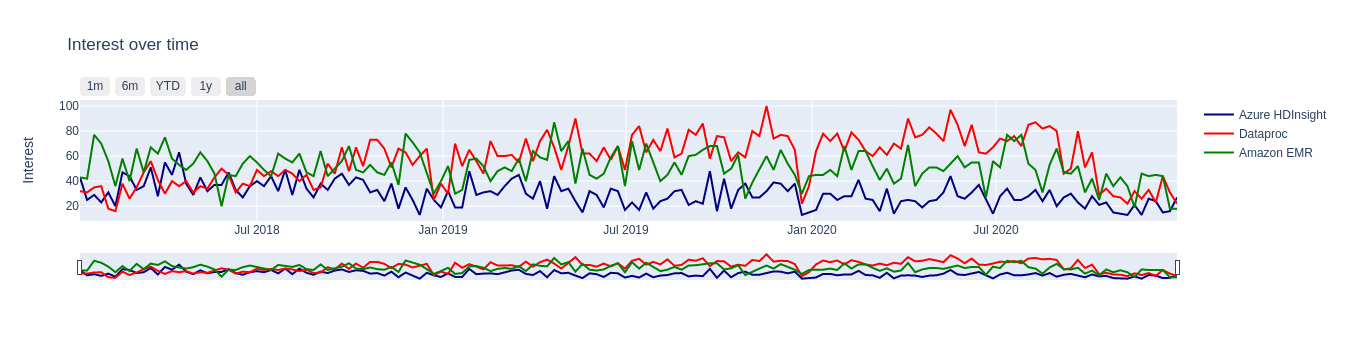

,Date,Azure HDInsight,Dataproc,Amazon EMR
0,2018-01-07,43,32,43
1,2018-01-14,25,31,42
2,2018-01-21,29,35,77
3,2018-01-28,23,36,70
4,2018-02-04,31,18,56
...,...,...,...,...
151,2020-11-29,26,33,44
152,2020-12-06,24,23,45
153,2020-12-13,15,44,44
154,2020-12-20,16,31,18


In [40]:
plot_interest_over_time(kw_list, df)

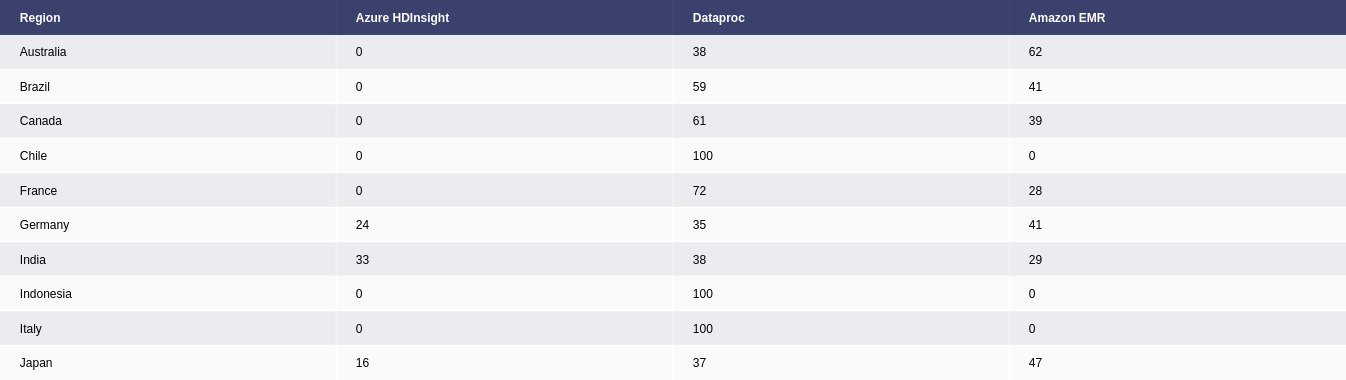

In [42]:
df_by_region = table_interest_by_region(kw_list, None, True)

[Return to Table of contents](#0)

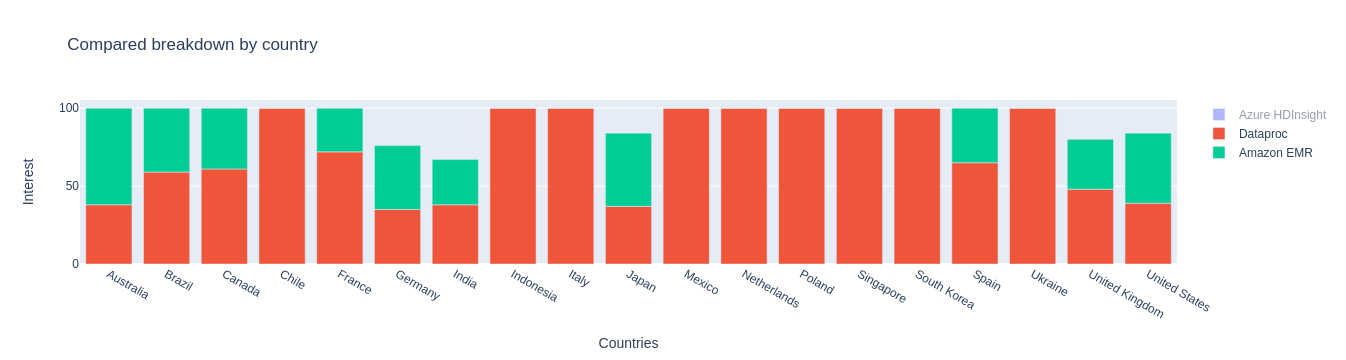

In [44]:
barplot_interest_by_region(kw_list, df_by_region);

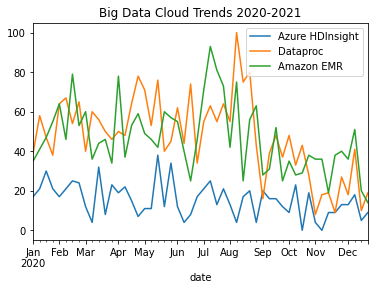

In [42]:
pytrends = TrendReq(hl='en-US', tz=360)
kw_list = ['Azure HDInsight', 'Dataproc', 'Amazon EMR']
pytrends.build_payload(kw_list, cat=0, timeframe='2020-01-01 2021-01-01', geo='US', gprop='')
trends = pytrends.interest_over_time()
trend_visualization = label_drop.plot(title = 'Big Data Cloud Trends 2020-2021')


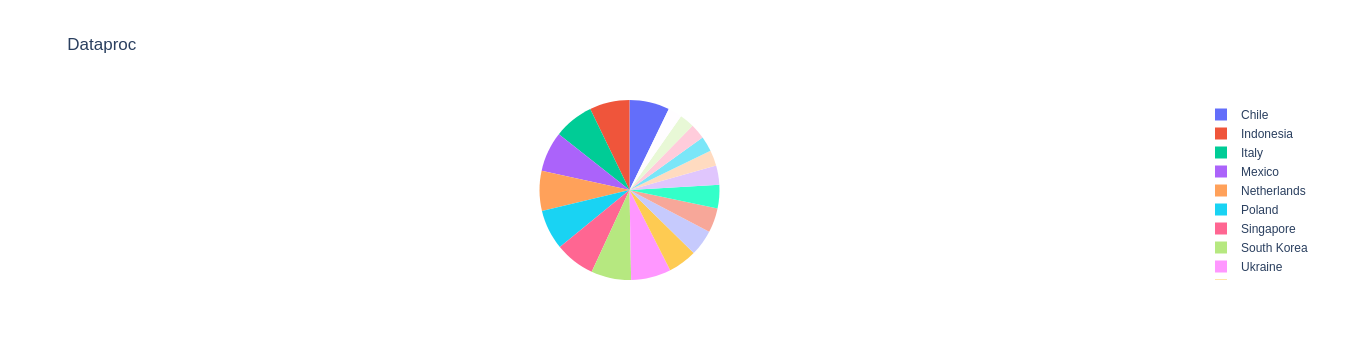

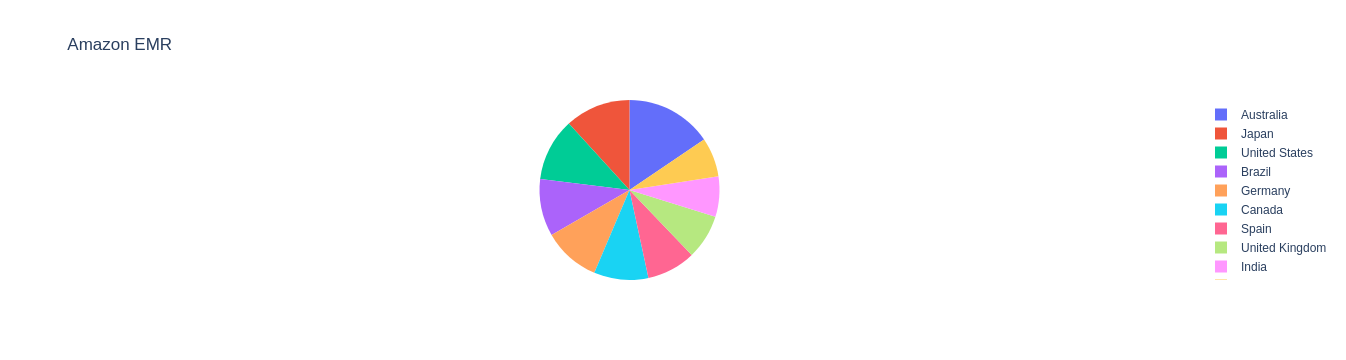

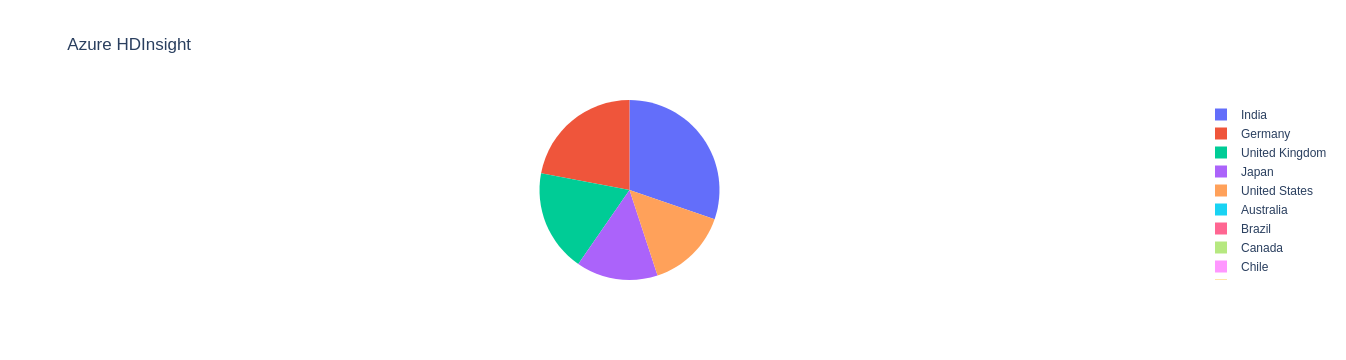

In [156]:
df = df_by_region
fig = px.pie(df, values='Dataproc', names='Region',title='Dataproc')
fig.update_traces(hoverinfo="label+percent+name",textinfo='none')
fig.show()

df = df_by_region
fig = px.pie(df, values='Amazon EMR', names='Region',title='Amazon EMR')
fig.update_traces(hoverinfo="label+percent+name",textinfo='none')
fig.show()


df = df_by_region
fig = px.pie(df, values='Azure HDInsight', names='Region',title='Azure HDInsight')
fig.update_traces(hoverinfo="label+percent+name",textinfo='none')
fig.show()

In [150]:
df=df.loc[(df!=0).any(1)]


a=list(df['Region'])
print(a)
_Dataproc= list(df['Dataproc'])
print(_Dataproc)


['Australia', 'Brazil', 'Canada', 'Chile', 'France', 'Germany', 'India', 'Indonesia', 'Italy', 'Japan', 'Mexico', 'Netherlands', 'Poland', 'Singapore', 'South Korea', 'Spain', 'Ukraine', 'United Kingdom', 'United States']
[38, 59, 61, 100, 72, 35, 38, 100, 100, 37, 100, 100, 100, 100, 100, 65, 100, 48, 39]


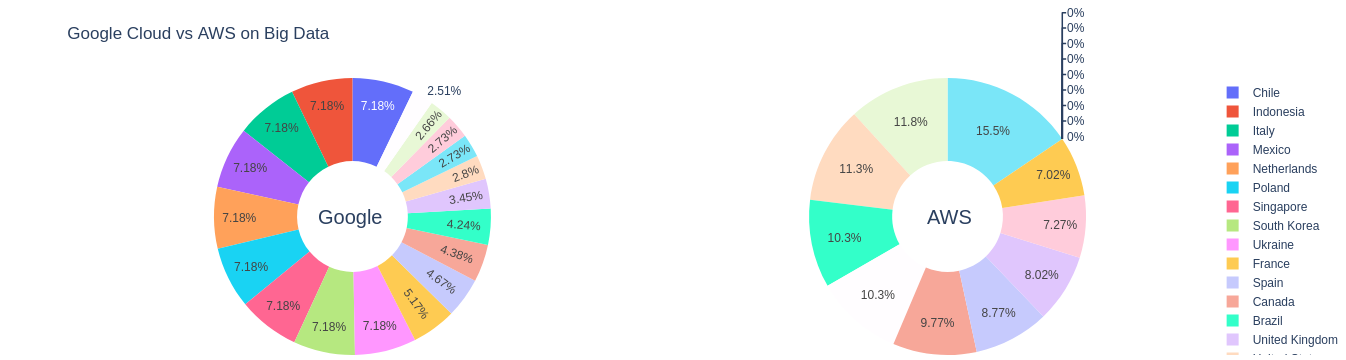

In [116]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels = list(df['Region'])
_Dataproc= list(df['Dataproc'])
_Azure= list(df['Azure HDInsight'])
_Amazon= list(df['Amazon EMR'])


# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=_Dataproc, name="Google Cloud"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=_Amazon, name="Aws"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Google Cloud vs AWS on Big Data",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Google', x=0.19, y=0.5, font_size=20, showarrow=False),
                 dict(text='AWS', x=0.8, y=0.5, font_size=20, showarrow=False)])

fig.update_layout(margin=dict(t=0, b=0, l=0, r=0))
fig.show()

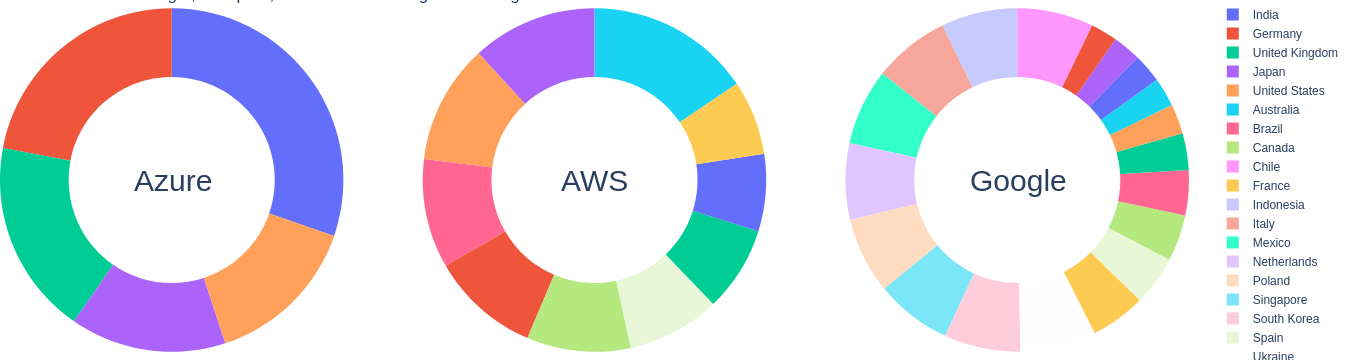

In [149]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels = list(df['Region'])
_Dataproc= list(df['Dataproc'])
_Azure= list(df['Azure HDInsight'])
_Amazon= list(df['Amazon EMR'])


# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=_Azure, name="Azure"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=_Amazon, name="Aws"),
              1, 2)
fig.add_trace(go.Pie(labels=labels, values=_Dataproc, name="Google"),
              1, 3)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.6, hoverinfo="label+percent+name",textinfo='none')

fig.update_layout(
    title_text="Azure HDInsight, Dataproc, Amazon EMR Usage Percentages",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Azure', x=0.11, y=0.5, font_size=30, showarrow=False),
                 dict(text='AWS', x=0.5, y=0.5, font_size=30, showarrow=False),
                dict(text='Google', x=0.9, y=0.5, font_size=30, showarrow=False)])


fig.update_layout(margin=dict(t=0, b=0, l=0, r=0))

fig.show()

[Return to Table of contents](#0)

<a id="6"></a> <br>
## <font color='red'>Q2: Highlighted big data projects in last two years</font>

<a id="7"></a> <br>
#### <font color='red'>2.1. Open Source Big Data Projects</font>

"Apache CouchDB","Apache Airflow","Delta Lake","Apache Cassandra","Apache Calcite","Datahub","Cython","CMAK","Apache Zeppelin","Nvidia RAPIDS","Clickhouse",
"Apache Beam","Apache Cassandra","Apache Flink","Apache Kafka","Apache Spark"

In [11]:
kw_list = set_new_query(["big data projects","big data tool"], '2019-01-01 2022-01-01')
table_related_queries(kw_list, get_related_queries())

big data projects related queries


Top        \
                             query value   
1                 big data project   100   
2               big data analytics    92   
3             projects on big data    88   
4                           hadoop    58   
5                  hadoop projects    58   
6                  hadoop big data    58   
7                 what is big data    58   
8            data science projects    48   
9   big data projects for students    43   
10                 apache projects    39   

                                               Rising           
                                                query    value  
1   let’s say we just completed a big event for a ...  35850.0  
2                         big data software solutions    400.0  
3                                              kaggle    190.0  
4                                      google scholar    130.0  
5                                               udemy     60.0  
6                                    what is big data     40.0  
7                                                 NaN      NaN  
8                                                 NaN      NaN  
9                                                 NaN      NaN  
10                                                NaN      NaN

big data tool related queries


Top        \
                          query value   
1              what is big data   100   
2       big data analytics tool    76   
3            big data analytics    76   
4                data analytics    76   
5                big data tools    55   
6                        hadoop    42   
7              big data testing    26   
8                         spark    26   
9    which describes a platform    25   
10  which describes a platform?    20   

                                               Rising          
                                                query   value  
1                         which describes a platform?  337750  
2   which process of the enterprise platform inter...  325700  
3                 which describes the network effect?  290400  
4   which statement describes an enterprise platform?  209050  
5   a new accenture client has implemented an ente...  209050  
6   a new accenture client is looking for a platfo...  203250  
7   a company is looking to share data between two...  191650  
8   which type of service offers a preconfigured t...  180000  
9   a company is struggling to keep track of its t...  174200  
10  what is the core function of an enterprise pla...  174200

In [15]:
kw_list = set_new_query(["Apache Beam","Apache Cassandra","Apache Flink","Apache Kafka","Apache Spark"], '2019-01-01 2022-01-01')
table_related_queries(kw_list, get_related_queries())



Apache Beam related queries


Top                        Rising         
              query value                   query    value
1          dataflow   100                kubeflow  31000.0
2      apache spark    30                     tfx    300.0
3             spark    30            apache flume    200.0
4          bigquery    27                redshift    190.0
5               gcp    26               snowflake    170.0
6             kafka    23  apache beam vs airflow    120.0
7      apache kafka    23    apache beam python 3    110.0
8      apache flink    22            gcp dataflow    100.0
9             flink    22                     gcp     90.0
10  dataflow google    22               big query     80.0

Apache Cassandra related queries


Top        \
                       query value   
1               apache spark   100   
2                      spark   100   
3            spark cassandra    99   
4         cassandra database    96   
5               apache kafka    78   
6                      kafka    78   
7   what is apache cassandra    67   
8          what is cassandra    67   
9                    mongodb    67   
10                  datastax    63   

                                               Rising         
                                                query  value  
1                                    amazon keyspaces  26200  
2                                            kubeflow  19000  
3                                           pixiedust  16900  
4             amazon managed apache cassandra service  14450  
5   apache cassandra was developed by which of the...   9600  
6                       apache cassandra developed by   2900  
7                          cassandra was developed by   1950  
8                                       apache pulsar   1700  
9                                                ceph    500  
10                                     apache airflow    450

Apache Flink related queries


Top                        Rising         
                    query value                   query    value
1            spark apache   100             apache hudi  32450.0
2                   spark    99  kinesis data analytics   2350.0
3            apache kafka    75       kinesis analytics   1100.0
4                   kafka    75           apache pulsar    600.0
5   apache flink vs spark    54                 airflow    250.0
6          flink vs spark    54                 pyspark    250.0
7                    beam    41          apache airflow    250.0
8             apache beam    41              kubernetes    120.0
9   apache flink vs kafka    36        flink kubernetes    120.0
10         flink vs kafka    36             aws kinesis    120.0

Apache Kafka related queries


Top                        Rising       
                    query value                   query  value
1            apache spark   100              amazon msk  13750
2                   spark   100                  ksqldb  11450
3                    java    71             apache hudi  11000
4              kafka java    71                kubeflow   6350
5   apache kafka tutorial    68                 aws msk   3050
6          kafka tutorial    68                kafkacat    600
7            spring kafka    57               snowflake    500
8                  spring    56                debezium    200
9    apache kafka example    51  apache pulsar vs kafka    200
10   what is apache kafka    51         pulsar vs kafka    200

Apache Spark related queries


Top                    Rising       
                   query value               query  value
1           spark hadoop   100          delta lake  30050
2    apache spark hadoop   100         apache hudi   5850
3                 hadoop   100  azure data factory    900
4          apache hadoop   100           spark 3.0    750
5    apache spark python    76    apache spark 3.0    750
6                 python    76    azure databricks    700
7           spark python    76  what is databricks    650
8         what is apache    72          databricks    400
9   what is apache spark    72    databricks spark    400
10         what is spark    72             pytorch    400

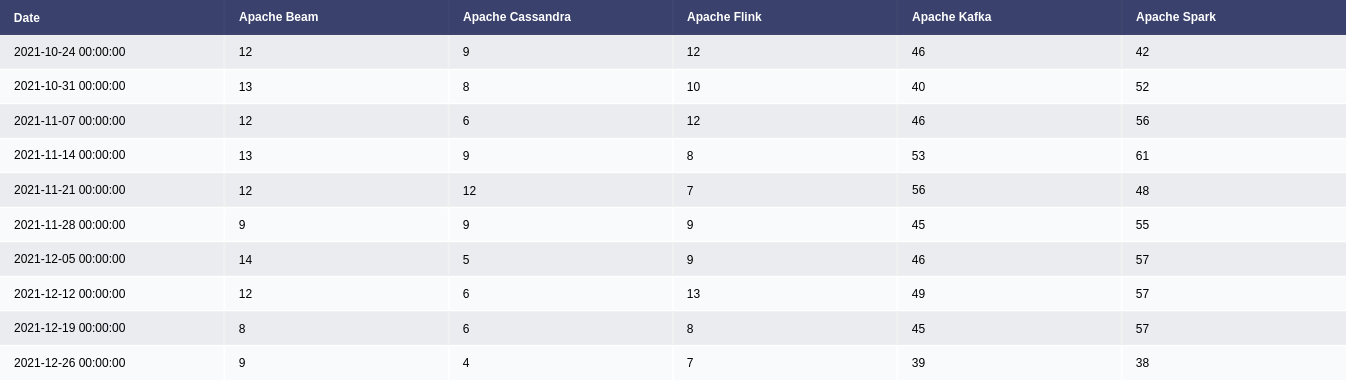

In [19]:
df = table_interest_over_time(kw_list, None, True);

In [17]:
display(df.describe().T.round(2))
display(df.corr().round(2))

,count,mean,std,min,25%,50%,75%,max
Apache Beam,156.0,16.06,5.85,4.0,11.00,17.0,21.0,29.0
Apache Cassandra,156.0,10.26,3.14,4.0,8.00,10.0,12.0,18.0
Apache Flink,156.0,10.58,3.05,4.0,8.00,10.0,13.0,21.0
Apache Kafka,156.0,52.09,9.54,29.0,44.75,53.0,59.0,71.0
Apache Spark,156.0,67.59,16.32,38.0,52.00,67.5,82.0,100.0


,Apache Beam,Apache Cassandra,Apache Flink,Apache Kafka,Apache Spark
Apache Beam,1.00,0.62,0.58,0.69,0.81
Apache Cassandra,0.62,1.00,0.49,0.62,0.66
Apache Flink,0.58,0.49,1.00,0.59,0.58
Apache Kafka,0.69,0.62,0.59,1.00,0.79
Apache Spark,0.81,0.66,0.58,0.79,1.00


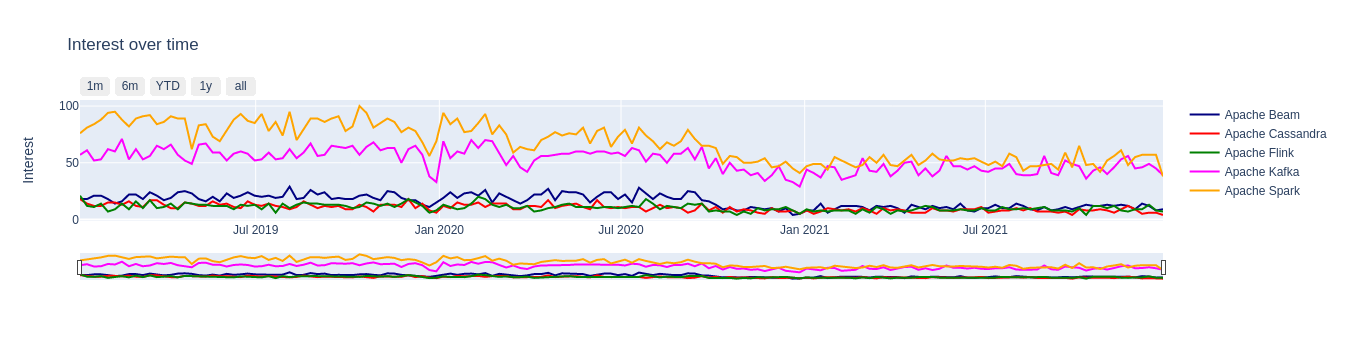

,Date,Apache Beam,Apache Cassandra,Apache Flink,Apache Kafka,Apache Spark
0,2019-01-06,18,18,21,57,76
1,2019-01-13,18,14,12,61,81
2,2019-01-20,21,12,11,52,84
3,2019-01-27,21,12,14,53,88
4,2019-02-03,18,15,7,62,94
...,...,...,...,...,...,...
151,2021-11-28,9,9,9,45,55
152,2021-12-05,14,5,9,46,57
153,2021-12-12,12,6,13,49,57
154,2021-12-19,8,6,8,45,57


In [18]:
plot_interest_over_time(kw_list, df)

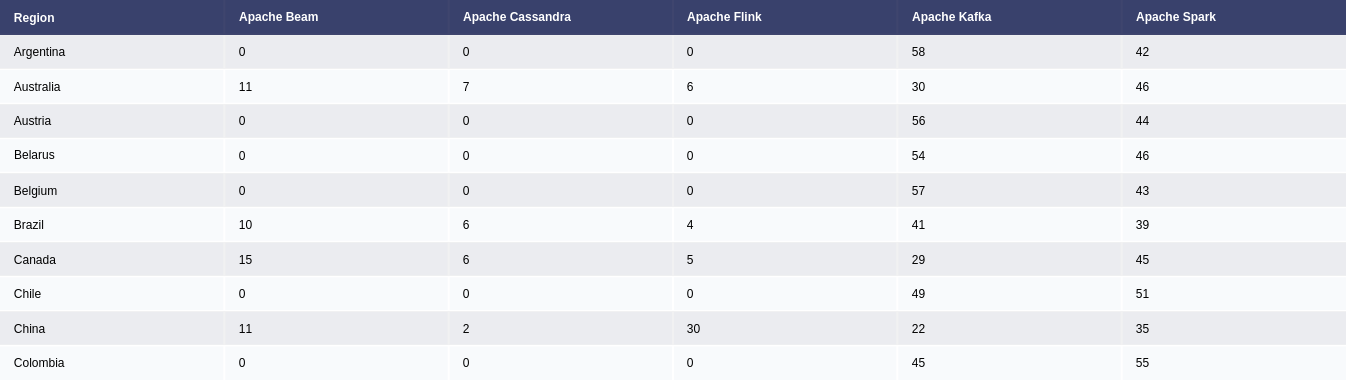

In [20]:
df_by_region = table_interest_by_region(kw_list, None, True)

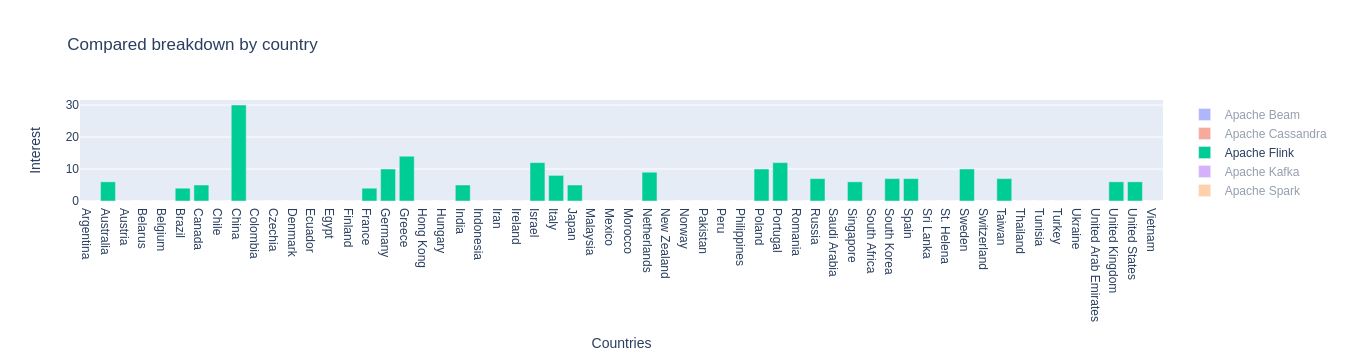

In [21]:
barplot_interest_by_region(kw_list, df_by_region);

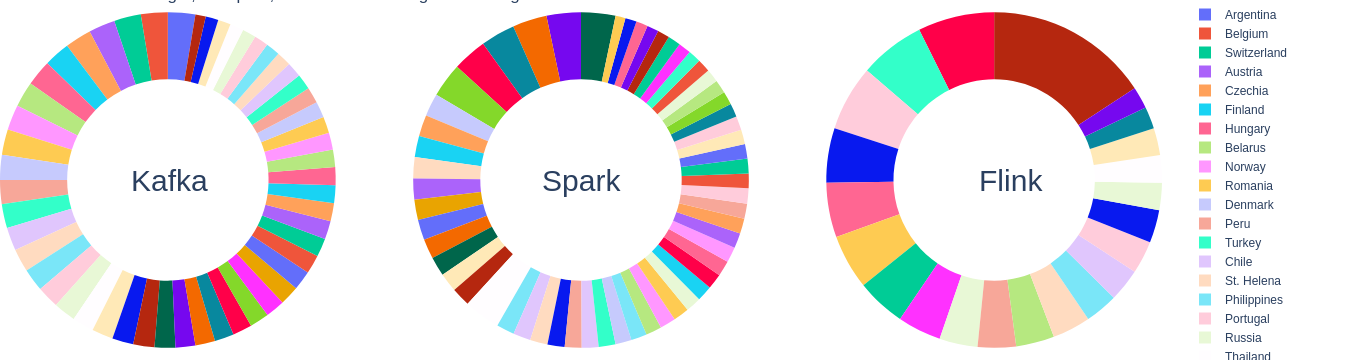

In [30]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels = list(df_by_region['Region'])
_Kafka= list(df_by_region['Apache Kafka'])
_Spark= list(df_by_region['Apache Spark'])
_Flink= list(df_by_region['Apache Flink'])


# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=_Kafka, name="Kafka"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=_Spark, name="Spark"),
              1, 2)
fig.add_trace(go.Pie(labels=labels, values=_Flink, name="Flink"),
              1, 3)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.6, hoverinfo="label+percent+name",textinfo='none')

fig.update_layout(
    title_text="Azure HDInsight, Dataproc, Amazon EMR Usage Percentages",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Kafka', x=0.11, y=0.5, font_size=30, showarrow=False),
                 dict(text='Spark', x=0.5, y=0.5, font_size=30, showarrow=False),
                dict(text='Flink', x=0.9, y=0.5, font_size=30, showarrow=False)])


fig.update_layout(margin=dict(t=0, b=0, l=0, r=0))

fig.show()

[Return to Table of contents](#0)

<a id="8"></a> <br>
#### <font color='red'>2.2. Correlation between search keywords</font>

In [22]:
BD_projects=["Apache CouchDB","Apache Airflow","Delta Lake","Apache Cassandra","Apache Calcite","Datahub","Cython","CMAK","Apache Zeppelin","Nvidia RAPIDS","Clickhouse",
"Apache Beam","Apache Cassandra","Apache Flink","Apache Kafka","Apache Spark"]

In [25]:
pytrends = TrendReq()
trendsovertime=pd.DataFrame()
for project in BD_projects:
    pytrends.build_payload(kw_list=[project], cat=0, timeframe='2019-01-01 2022-01-01', geo='', gprop='')
    trendsovertime=trendsovertime.append(pytrends.interest_over_time())

In [26]:
#Converting weekly data to monthly data
monthly=trendsovertime.resample('M').mean()
monthly.drop('isPartial',axis='columns',inplace=True)

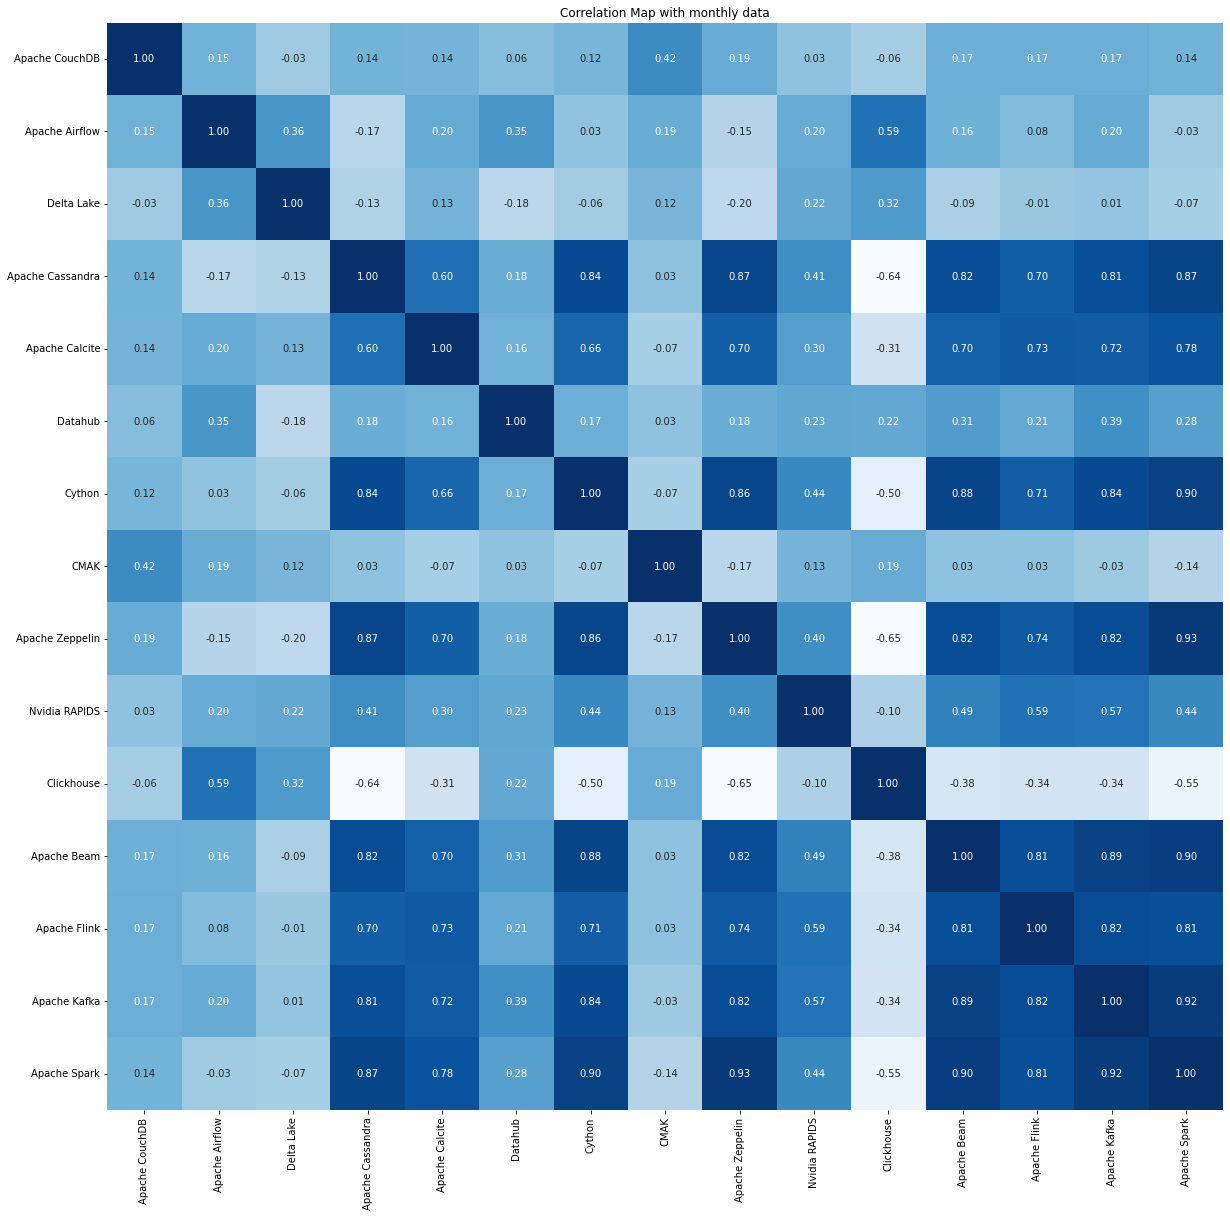

In [27]:
plt.figure(figsize=(20,20))
sns.heatmap(monthly.corr(),cmap='Blues',annot=True,fmt = ".2f",cbar=False)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.title('Correlation Map with monthly data')
plt.show()

[Return to Table of contents](#0)

## <a id="9"></a> <br>
# Result

We examined the use of Hadoop on-prem and cloud.Then we looked at Azure HDInsight, Dataproc, Amazon EMR usage percentages by region.
"Hadoop in cloud" is more searched. When we examine it on a country basis, we see that on-prem hadoop is generally researched in India. 
We gathered on-prem hadoop researches in three groups :cloudera hadoop, hortonworks hadoop, MapR hadoop. Cloudera hadoop is dominantly researched in google.
<br>
We gathered cloud-based hadoop researches in five groups :amazon hadoop, dataproc hadoop, treasure data hadoop, qubole hadoop, azure hadoop. Overall, Amazon is ahead. But lately azure hadoop has been researched more frequently.
<br>

Let's compare Azure HDInsight, Dataproc from Google Cloud, Amazon EMRs from big data cloud platforms. Amazon and Google Cloud have managed to be the most researched in the big data world. If we analyze it on a country-by-country basis, Azure is the most researched in India, AWS is  in Australia, and Google Cloud is in South Korea.
<br>
<br>

We examined five of big data project closely: Apache Beam, Apache Cassandra ,Apache Flink ,Apache Kafka, Apache Spark.
Spark has been the most researched project overall and Kafka is the second one. If we analyze it on a country-by-country basis, we will notice that Flink is mostly researched in China.
<br>

When we look at the relationship between the big data projects thanks to correlation map, We see that Apache projects are closely related to each other.
The closest ones are:
- Apache Zeppelin - Apache Spark
- Apache Kafka - Apache Spark
- Apache Beam - Apache Spark
- Apache Kafka - Apache Flink
